# Analisis SIMCE en el rendimiento escolar en Chile

El Sistema de Medicion de Calidad de la Educacion o SIMCE, fue creado en 1968 como prueba estandarizada administrada por el ministerio de educacion para evaluar a los estudiantes de Chile y determinar su rendimiento y calidad academica. Nuestra motivacion existe en investigar las posibles disparidades del sistema de educacion usando bases de datos publicas del gobierno y asi saber que areas clave necesitan un enfoque de efuerzos para potencialmente mejorar el nivel de educacion.

Con nuestro proyecto no solo queremos comparar la calidad de educacion a traves de los años, si no que tambien ver si existe alguna correlacion entre el nivel de formacion y que tan vulnerable sea un sector.

Para cumplir nuestros objetivos dejamos guardados para en el analisis **6 archivos** conteniendo varios datos para extraer que nos serviran para el analisis conteniendo los siguientes cursos:

- `Cuartos Basicos 2014`
- `Cuartos Basicos 2016`
- `Cuartos Basicos 2022`
- `Sextos Basicos 2016`
- `Octavos Basicos 2019`
- `Segundos Medios 2022`

Al estar todos en el formato .xlsx, la libreria **pandas** sera critica en la lectura y manejo rapido de estos datos. Cada uno de estos archivos tienen varias columnas con datos que nos interesan comparar:

- `nom_rbd` | Nombre del establecimiento
- `cod_grupo` | Grado socioeconomico
- `cod_rural_rbd` | Codigo de ruralidad
- `nom_reg_rbd` | Nombre de la region
- `nom_com_rbd` | Nombre de la comuna
- `nom_pro_rbd` | Nombre de la provincia
- `prom_lect` | Promedio de lectura
- `prom_mate` | Promedio de matematicas

Cabe destacar que `prom_lect` y `prom_mate` tienen distintas extensiones segun el curso.

## Glosario

**cod_grupo**:
- 1.0 = Bajo
- 2.0 = Medio bajo
- 3.0 = Medio
- 4.0 = Medio alto
- 5.0 = Alto

**cod_rural**:
- 1.0 = Urbano
- 2.0 = Rural

**cod_depe2**:
- 1.0 = Municipal
- 2.0 = Particular subvencionado
- 3.0 = Particular pagado
- 4.0 = Servicio local de educacion

Para poder empezar con nuestro analisis, tendremos que importar las librerias a usar y leer los archivos.

In [1]:
# imports a usar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
pd.set_option('future.no_silent_downcasting', True)

cuarto2014 = "data/2014/simce4b2014_rbd_publica_final.xlsx"
cuarto2016 = "data/2016/simce4b2016_rbd_publica_final.xlsx"
sexto2016 = "data/2016/simce6b2016_rbd_publica_final.xlsx"
octavo2019 = "data/2019/simce8b2019_rbd.xlsx"
cuarto2022 = "data/2022/Simce4b2022_rbd_final.xlsx"
segundo2022 = "data/2022/Simce2m2022_rbd_final.xlsx"

def filtrar(df, lect: 'str', mate: 'str'):
    filtrado = ['nom_rbd', 'agno', 'cod_grupo','cod_rural_rbd','nom_reg_rbd','nom_com_rbd','nom_pro_rbd','cod_depe2',lect,mate]
    return df[filtrado]

# cuartos basicos:
df14_4 = pd.read_excel(cuarto2014)
df14_4 = filtrar(df14_4, 'prom_lect4b_rbd', 'prom_mate4b_rbd')

df16_4 = pd.read_excel(cuarto2016)
df16_4 = filtrar(df16_4, 'prom_lect4b_rbd', 'prom_mate4b_rbd')

df22_4 = pd.read_excel(cuarto2022)
df22_4 = filtrar(df22_4, 'prom_lect4b_rbd', 'prom_mate4b_rbd')

# sexto basico 2016
df16_6 = pd.read_excel(sexto2016)
df16_6 = filtrar(df16_6, 'prom_lect6b_rbd', 'prom_mate6b_rbd')

# octavo basico 2019
df19_8 = pd.read_excel(octavo2019)
df19_8 = filtrar(df19_8, 'prom_lect8b_rbd', 'prom_mate8b_rbd')

# segundo medio 2022
df22_ii = pd.read_excel(segundo2022)
df22_ii = filtrar(df22_ii, 'prom_lect2m_rbd', 'prom_mate2m_rbd')

Para revisar si hay algunas cosas que no concuerdan, revisaremos como esta cada dataframe.

In [2]:
df14_4.head()

,nom_rbd,agno,cod_grupo,cod_rural_rbd,nom_reg_rbd,nom_com_rbd,nom_pro_rbd,cod_depe2,prom_lect4b_rbd,prom_mate4b_rbd
0,JOVINA NARANJO FERNANDEZ,2014,Medio,Urbano,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,Municipal,274.0,262.0
1,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,2014,Medio,Urbano,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,Municipal,255.0,239.0
2,ESCUELA REPUBLICA DE ISRAEL,2014,Medio,Urbano,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,Municipal,261.0,250.0
3,ESCUELA REPUBLICA DE FRANCIA,2014,Medio,Urbano,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,Municipal,234.0,207.0
4,ESC. GRAL. PEDRO LAGOS MARCHANT,2014,Bajo,Urbano,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,Municipal,284.0,270.0


In [3]:
df16_4.head()

,nom_rbd,agno,cod_grupo,cod_rural_rbd,nom_reg_rbd,nom_com_rbd,nom_pro_rbd,cod_depe2,prom_lect4b_rbd,prom_mate4b_rbd
0,JOVINA NARANJO FERNANDEZ,2016,Medio,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,274.0,257.0
1,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,2016,Medio bajo,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,271.0,259.0
2,ESCUELA REPUBLICA DE ISRAEL,2016,Medio,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,291.0,298.0
3,ESCUELA REPUBLICA DE FRANCIA,2016,Medio bajo,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,243.0,235.0
4,ESC. GRAL. PEDRO LAGOS MARCHANT,2016,Medio bajo,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,257.0,236.0


In [4]:
df22_4.head()

,nom_rbd,agno,cod_grupo,cod_rural_rbd,nom_reg_rbd,nom_com_rbd,nom_pro_rbd,cod_depe2,prom_lect4b_rbd,prom_mate4b_rbd
0,ESCUELA RURAL ALEJANDRO VASQUEZ BALDEVELLANO,2022,1.0,2,DE LOS LAGOS,SAN PABLO,OSORNO,1,0.0,0.0
1,ESC. BASICA ALTO MECO,2022,1.0,2,DE LA ARAUCANÍA,LAUTARO,CAUTÍN,1,239.0,218.0
2,ESCUELA HÉROES DE CHILE,2022,2.0,1,DEL BIOBÍO,YUMBEL,BIOBÍO,1,222.0,211.0
3,ESCUELA BASICA LOS OLIVOS,2022,1.0,2,DE ÑUBLE,RÁNQUIL,ITATA,1,276.0,250.0
4,COLEGIO WILLIAM JAMES,2022,4.0,1,DE VALPARAÍSO,VIÑA DEL MAR,VALPARAÍSO,3,264.0,231.0


In [5]:
df16_6.head()

,nom_rbd,agno,cod_grupo,cod_rural_rbd,nom_reg_rbd,nom_com_rbd,nom_pro_rbd,cod_depe2,prom_lect6b_rbd,prom_mate6b_rbd
0,JOVINA NARANJO FERNANDEZ,2016,Medio,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,266.0,259.0
1,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,2016,Medio bajo,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,248.0,233.0
2,ESCUELA REPUBLICA DE ISRAEL,2016,Medio,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,262.0,247.0
3,ESCUELA REPUBLICA DE FRANCIA,2016,Medio,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,202.0,204.0
4,ESC. GRAL. PEDRO LAGOS MARCHANT,2016,Medio bajo,Urbano,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,Municipal,237.0,214.0


In [6]:
df19_8.head()

,nom_rbd,agno,cod_grupo,cod_rural_rbd,nom_reg_rbd,nom_com_rbd,nom_pro_rbd,cod_depe2,prom_lect8b_rbd,prom_mate8b_rbd
0,JOVINA NARANJO FERNANDEZ,2019,3.0,1,DE ARICA Y PARINACOTA,ARICA,ARICA,1,260.0,272.0
1,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,2019,3.0,1,DE ARICA Y PARINACOTA,ARICA,ARICA,1,249.0,259.0
2,ESCUELA REPUBLICA DE ISRAEL,2019,3.0,1,DE ARICA Y PARINACOTA,ARICA,ARICA,1,249.0,275.0
3,ESCUELA REPUBLICA DE FRANCIA,2019,3.0,1,DE ARICA Y PARINACOTA,ARICA,ARICA,1,243.0,245.0
4,ESC. GRAL. PEDRO LAGOS MARCHANT,2019,2.0,1,DE ARICA Y PARINACOTA,ARICA,ARICA,1,201.0,218.0


In [7]:
df22_ii.head()

,nom_rbd,agno,cod_grupo,cod_rural_rbd,nom_reg_rbd,nom_com_rbd,nom_pro_rbd,cod_depe2,prom_lect2m_rbd,prom_mate2m_rbd
0,LICEO POLITECNICO ARICA,2022,1.0,1,DE ARICA Y PARINACOTA,ARICA,ARICA,4,218.0,242.0
1,LICEO ALBERTO HURTADO,2022,3.0,1,METROPOLITANA DE SANTIAGO,QUINTA NORMAL,SANTIAGO,2,230.0,232.0
2,LICEO POLIV.SAN JOSE DE LA PRECIOSA SANG,2022,3.0,1,METROPOLITANA DE SANTIAGO,QUINTA NORMAL,SANTIAGO,2,254.0,271.0
3,COLEGIO BICENTENARIO ELVIRA HURTADO DE MATTE D...,2022,3.0,1,METROPOLITANA DE SANTIAGO,QUINTA NORMAL,SANTIAGO,2,250.0,286.0
4,CENTRO EDUCACIONAL ALBERTO HURTADO,2022,2.0,1,METROPOLITANA DE SANTIAGO,QUINTA NORMAL,SANTIAGO,2,221.0,227.0


Antes de pasar a nuestro analisis y preguntas objetivo, queremos estandarizar los datos que se muestran de manera distinta, como el `cod_depe2`, `cod_grupo` y `cod_rural`, los cuales no estan mostrados de manera numerica en los dataframes de 2014 y 2016.

In [8]:
reempDepe = {"Municipal": "1.0","Particular subvencionado": "2.0","Particular pagado": "3.0","Servicio Local de Educación": "4.0"}
reempGrupo = {"Bajo": "1.0","Medio bajo": "2.0","Medio": "3.0","Medio alto": "4.0","Alto": "5.0"}
reempRural = {"Urbano": "1","Rural": "2"}

# 2014
df14_4["cod_depe2"] = pd.to_numeric(df14_4["cod_depe2"].replace(reempDepe))
df14_4["cod_grupo"] = pd.to_numeric(df14_4["cod_grupo"].replace(reempGrupo))
df14_4["cod_rural_rbd"] = pd.to_numeric(df14_4["cod_rural_rbd"].replace(reempRural))

# 2016
df16_4["cod_depe2"] = pd.to_numeric(df16_4["cod_depe2"].replace(reempDepe))
df16_4["cod_grupo"] = pd.to_numeric(df16_4["cod_grupo"].replace(reempGrupo))
df16_4["cod_rural_rbd"] = pd.to_numeric(df16_4["cod_rural_rbd"].replace(reempRural))

df16_6["cod_depe2"] = pd.to_numeric(df16_6["cod_depe2"].replace(reempDepe))
df16_6["cod_grupo"] = pd.to_numeric(df16_6["cod_grupo"].replace(reempGrupo))
df16_6["cod_rural_rbd"] = pd.to_numeric(df16_6["cod_rural_rbd"].replace(reempRural))

Y si ahora abrimos esos dataframes, deberian estar con el tipo de dato corecto.

In [9]:
df14_4.head()

,nom_rbd,agno,cod_grupo,cod_rural_rbd,nom_reg_rbd,nom_com_rbd,nom_pro_rbd,cod_depe2,prom_lect4b_rbd,prom_mate4b_rbd
0,JOVINA NARANJO FERNANDEZ,2014,3.0,1,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,1.0,274.0,262.0
1,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,2014,3.0,1,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,1.0,255.0,239.0
2,ESCUELA REPUBLICA DE ISRAEL,2014,3.0,1,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,1.0,261.0,250.0
3,ESCUELA REPUBLICA DE FRANCIA,2014,3.0,1,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,1.0,234.0,207.0
4,ESC. GRAL. PEDRO LAGOS MARCHANT,2014,1.0,1,REGIÓN ARICA - PARINACOTA,ARICA,ARICA,1.0,284.0,270.0


In [10]:
df16_4.head()

,nom_rbd,agno,cod_grupo,cod_rural_rbd,nom_reg_rbd,nom_com_rbd,nom_pro_rbd,cod_depe2,prom_lect4b_rbd,prom_mate4b_rbd
0,JOVINA NARANJO FERNANDEZ,2016,3.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,274.0,257.0
1,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,2016,2.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,271.0,259.0
2,ESCUELA REPUBLICA DE ISRAEL,2016,3.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,291.0,298.0
3,ESCUELA REPUBLICA DE FRANCIA,2016,2.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,243.0,235.0
4,ESC. GRAL. PEDRO LAGOS MARCHANT,2016,2.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,257.0,236.0


In [11]:
df16_6.head()

,nom_rbd,agno,cod_grupo,cod_rural_rbd,nom_reg_rbd,nom_com_rbd,nom_pro_rbd,cod_depe2,prom_lect6b_rbd,prom_mate6b_rbd
0,JOVINA NARANJO FERNANDEZ,2016,3.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,266.0,259.0
1,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,2016,2.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,248.0,233.0
2,ESCUELA REPUBLICA DE ISRAEL,2016,3.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,262.0,247.0
3,ESCUELA REPUBLICA DE FRANCIA,2016,3.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,202.0,204.0
4,ESC. GRAL. PEDRO LAGOS MARCHANT,2016,2.0,1,REGION DE ARICA Y PARINACOTA,ARICA,ARICA,1.0,237.0,214.0


Con los dataframes leidos y organizados, podemos pasar a la siguiente parte del analisis.

# Preguntas Objetivo
### 1. ¿Los resultados SIMCE varian significativamente por comuna?
### 2. ¿Como afecto la pandemia los resultados de la prueba?
### 3. ¿Existe una mejora o un deterioro en los puntajes al pasar de los años?
### 4. ¿Existe una diferencia notable entre los puntajes de colegios segun su codigo de dependencia?
### 5. ¿Las generaciones (4to-6to-8vo-2do) mantienen su puntaje al pasar de los años?
### 6. ¿Afecta el grupo socioeconomico el puntaje SIMCE?

El proposito final es comparar las variables de la tabla para saber DONDE los esfuerzos de ayuda deberian enfocarse. Al haber varios datos que pueden influenciar los puntajes cabe destacar que algunos tienen una mayor influencia que los otros- y ahi es donde habria que poner nuestra atencion.

## Pregunta 1

In [12]:
# se agrupan los excel en nombre region y nombre comuna ademas de calcular el promedio por columna y su desviacion estandar

df14_mean_4 = df14_4.groupby(['nom_reg_rbd', 'nom_com_rbd'])[['prom_lect4b_rbd', 'prom_mate4b_rbd']].mean().reset_index()
df14_mean_4.columns = ['nom_reg_rbd', 'nom_com_rbd', 'prom_lect4b_rbd','prom_mate4b_rbd']
df14_mean_4['prom_lect4b_rbd'], df14_mean_4['prom_mate4b_rbd'] = round(df14_mean_4['prom_lect4b_rbd'], 2), round(df14_mean_4['prom_mate4b_rbd'], 2)

df16_mean_6 = df16_6.groupby(['nom_reg_rbd', 'nom_com_rbd'])[['prom_lect6b_rbd', 'prom_mate6b_rbd']].mean().reset_index()
df16_mean_6.columns = ['nom_reg_rbd', 'nom_com_rbd', 'prom_lect6b_rbd','prom_mate6b_rbd']
df16_mean_6['prom_lect6b_rbd'], df16_mean_6['prom_mate6b_rbd'] = round(df16_mean_6['prom_lect6b_rbd'], 2), round(df16_mean_6['prom_mate6b_rbd'], 2)

df16_mean_4 = df16_4.groupby(['nom_reg_rbd', 'nom_com_rbd'])[['prom_lect4b_rbd', 'prom_mate4b_rbd']].mean().reset_index()
df16_mean_4.columns = ['nom_reg_rbd', 'nom_com_rbd', 'prom_lect4b_rbd','prom_mate4b_rbd']
df16_mean_4['prom_lect4b_rbd'], df16_mean_4['prom_mate4b_rbd'] = round(df16_mean_4['prom_lect4b_rbd'], 2), round(df16_mean_4['prom_mate4b_rbd'], 2)

df19_mean = df19_8.groupby(['nom_reg_rbd', 'nom_com_rbd'])[['prom_lect8b_rbd', 'prom_mate8b_rbd']].mean().reset_index()
df19_mean.columns = ['nom_reg_rbd', 'nom_com_rbd', 'prom_lect8b_rbd', 'prom_mate8b_rbd']
df19_mean['prom_lect8b_rbd'], df19_mean['prom_mate8b_rbd'] = round(df19_mean['prom_lect8b_rbd'], 2), round(df19_mean['prom_mate8b_rbd'], 2)

df22_mean_4 = df22_4.groupby(['nom_reg_rbd', 'nom_com_rbd'])[['prom_lect4b_rbd', 'prom_mate4b_rbd']].mean().reset_index()
df22_mean_4.columns = ['nom_reg_rbd', 'nom_com_rbd', 'prom_lect4b_rbd','prom_mate4b_rbd']
df22_mean_4['prom_lect4b_rbd'], df22_mean_4['prom_mate4b_rbd'] = round(df22_mean_4['prom_lect4b_rbd'], 2), round(df22_mean_4['prom_mate4b_rbd'], 2)

df22_mean_2 = df22_ii.groupby(['nom_reg_rbd', 'nom_com_rbd'])[['prom_lect2m_rbd', 'prom_mate2m_rbd']].mean().reset_index()
df22_mean_2.columns = ['nom_reg_rbd', 'nom_com_rbd', 'prom_lect2m_rbd','prom_mate2m_rbd']
df22_mean_2['prom_lect2m_rbd'], df22_mean_2['prom_mate2m_rbd'] = round(df22_mean_2['prom_lect2m_rbd'], 2), round(df22_mean_2['prom_mate2m_rbd'], 2)

# obtenemos el promedio en las dos pruebas y se eliminan los que no tienen promedios
df14_mean_4['prom_mate_leng'] = (df14_mean_4['prom_lect4b_rbd'] + df14_mean_4['prom_mate4b_rbd'])/2
df14_mean_4 = df14_mean_4.dropna(subset=['prom_mate_leng'])
df14_mean_4 = df14_mean_4[df14_mean_4['prom_mate_leng'] != 0]
df14_mean_4['curso'] = '4b'

df16_mean_6['prom_mate_leng'] = (df16_mean_6['prom_lect6b_rbd'] + df16_mean_6['prom_mate6b_rbd'])/2
df16_mean_6 = df16_mean_6.dropna(subset=['prom_mate_leng'])
df16_mean_6 = df16_mean_6[df16_mean_6['prom_mate_leng'] != 0]
df16_mean_6['curso'] = '6b'

df16_mean_4['prom_mate_leng'] = (df16_mean_4['prom_lect4b_rbd'] + df16_mean_4['prom_mate4b_rbd'])/2
df16_mean_4 = df16_mean_4.dropna(subset=['prom_mate_leng'])
df16_mean_4 = df16_mean_4[df16_mean_4['prom_mate_leng'] != 0]
df16_mean_4['curso'] = '4b'

df19_mean['prom_mate_leng'] = (df19_mean['prom_lect8b_rbd'] + df19_mean['prom_mate8b_rbd'])/2
df19_mean = df19_mean.dropna(subset=['prom_mate_leng'])
df19_mean = df19_mean[df19_mean['prom_mate_leng'] != 0]
df19_mean['curso'] = '8b'

df22_mean_2['prom_mate_leng'] = (df22_mean_2['prom_lect2m_rbd'] + df22_mean_2['prom_mate2m_rbd'])/2
df22_mean_2 = df22_mean_2.dropna(subset=['prom_mate_leng'])
df22_mean_2 = df22_mean_2[df22_mean_2['prom_mate_leng'] != 0]
df22_mean_2['curso'] = '2m'

df22_mean_4['prom_mate_leng'] = (df22_mean_4['prom_lect4b_rbd'] + df22_mean_4['prom_mate4b_rbd'])/2
df22_mean_4 = df22_mean_4.dropna(subset=['prom_mate_leng'])
df22_mean_4 = df22_mean_4[df22_mean_4['prom_mate_leng'] != 0]
df22_mean_4['curso'] = '4b'

# obtenemos la mejor y peor comuna en las dos pruebas en conjunto de cada año
df14_ordenado = df14_mean_4.sort_values(by='prom_mate_leng', ascending=False)
df14_comunas = pd.concat([df14_ordenado.head(2), df14_ordenado.tail(2)], ignore_index=True)
df14_comunas['year'] = 2014

df16_ordenado_6 = df16_mean_6.sort_values(by='prom_mate_leng', ascending=False)
df16_comunas_6 = pd.concat([df16_ordenado_6.head(2), df16_ordenado_6.tail(2)], ignore_index=True)
df16_comunas_6['year'] = 2016

df16_ordenado_4 = df16_mean_4.sort_values(by='prom_mate_leng', ascending=False)
df16_comunas_4 = pd.concat([df16_ordenado_4.head(2), df16_ordenado_4.tail(2)], ignore_index=True)
df16_comunas_4['year'] = 2016

df19_ordenado = df19_mean.sort_values(by='prom_mate_leng', ascending=False)
df19_comunas = pd.concat([df19_ordenado.head(2), df19_ordenado.tail(2)], ignore_index=True)
df19_comunas['year'] = 2019

df19_comunas.loc[df19_comunas['nom_com_rbd'] == 'VITAC', 'nom_com_rbd'] = 'VITACURA'
df19_comunas.loc[df19_comunas['nom_com_rbd'] == 'O\'HIG', 'nom_com_rbd'] = 'O\'HIGGINS'
df19_comunas.loc[df19_comunas['nom_com_rbd'] == 'GENER', 'nom_com_rbd'] = 'GENERAL LAGOS'
df19_comunas.loc[df19_comunas['nom_com_rbd'] == 'CAMAR', 'nom_com_rbd'] = 'CAMARONES'

df22_ordenado_2 = df22_mean_2.sort_values(by='prom_mate_leng', ascending=False)
df22_comunas_2 = pd.concat([df22_ordenado_2.head(2), df22_ordenado_2.tail(2)], ignore_index=True)
df22_comunas_2['year'] = 2022

df22_ordenado_4 = df22_mean_4.sort_values(by='prom_mate_leng', ascending=False)
df22_comunas_4 = pd.concat([df22_ordenado_4.head(2), df22_ordenado_4.tail(2)], ignore_index=True)
df22_comunas_4['year'] = 2022

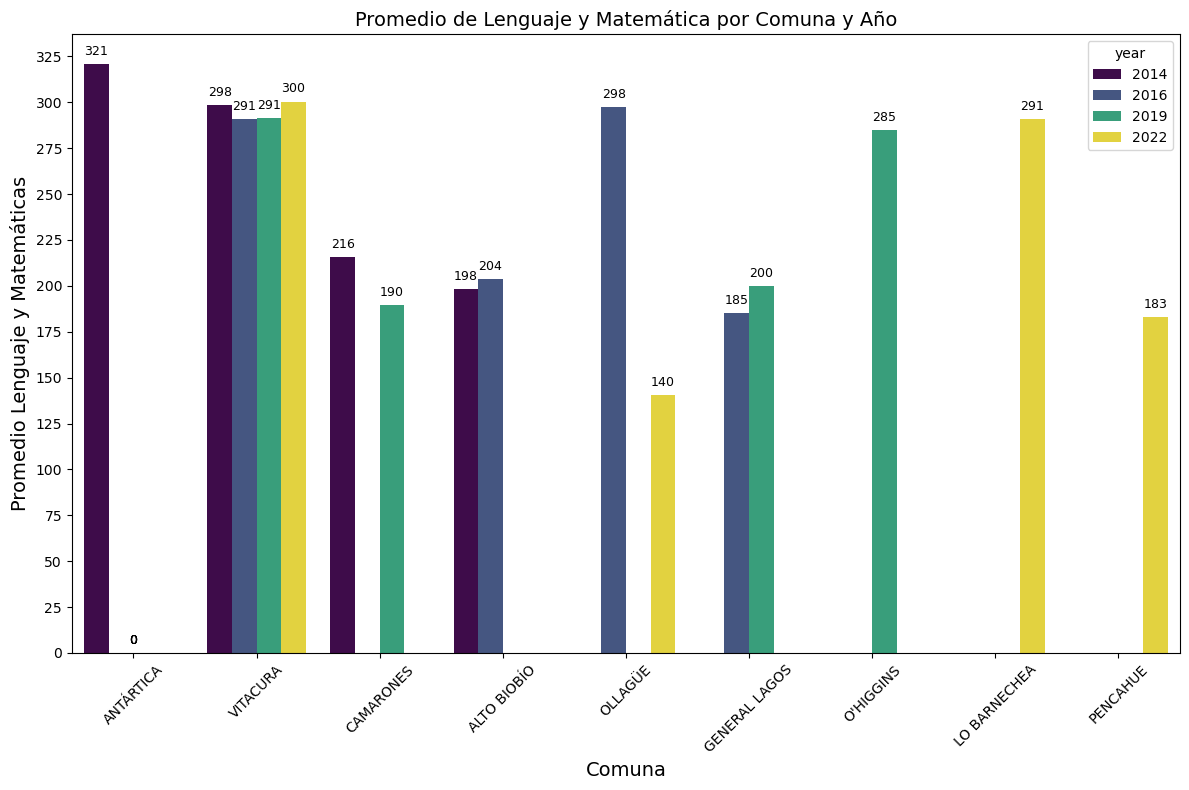

In [13]:
# se comparan distintos años y cursos
df_analisis = pd.concat([df14_comunas, df16_comunas_6, df19_comunas, df22_comunas_2], ignore_index=True)

plt.figure(figsize=(12, 8))

ax = sns.barplot(data=df_analisis, x='nom_com_rbd', y='prom_mate_leng', hue='year', palette='viridis')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,       
            p.get_height() + 5,                   
            f'{p.get_height():.0f}',              
            ha='center',
            fontsize=9)                           


plt.xlabel('Comuna', fontsize=14)
plt.ylabel('Promedio Lenguaje y Matemáticas', fontsize=14)
plt.title('Promedio de Lenguaje y Matemática por Comuna y Año', fontsize=14)

y_values = np.arange(0, 350, 25)  # Crear una secuencia de valores en el eje Y de 50 en 50
plt.yticks(y_values)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

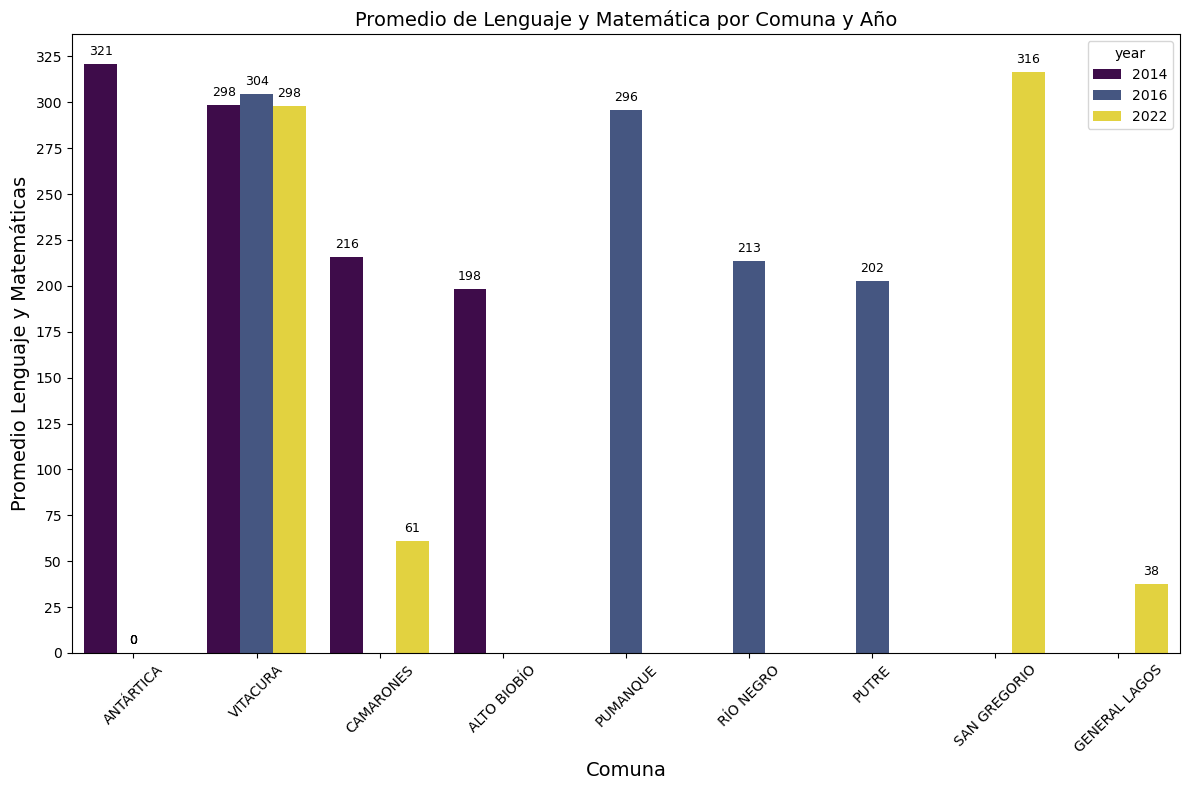

In [14]:
df_analisis = pd.concat([df14_comunas, df16_comunas_4, df22_comunas_4], ignore_index=True)

plt.figure(figsize=(12, 8))

ax = sns.barplot(data=df_analisis, x='nom_com_rbd', y='prom_mate_leng', hue='year', palette='viridis')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,       
            p.get_height() + 5,                   
            f'{p.get_height():.0f}',              
            ha='center',
            fontsize=9)                           


plt.xlabel('Comuna', fontsize=14)
plt.ylabel('Promedio Lenguaje y Matemáticas', fontsize=14)
plt.title('Promedio de Lenguaje y Matemática por Comuna y Año', fontsize=14)

y_values = np.arange(0, 350, 25)  # Crear una secuencia de valores en el eje Y de 50 en 50
plt.yticks(y_values)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

## Analisis(primer grafico)
El grafico anterior muestra las dos mejores y peores comunas en cuanto resultados del simce en matematicas y lenguaje por año, teniendo un total de 9 comunas. En 2014 se analiza un cuarto basico, en 2016 un sexto basico, en 2019 un octavo basico y en 2022 un segundo medio.

### Los resultados indican que:
1. Vitacura se encuentra en las comunas con mejores resultados en el simce en estos años.
2. La comuna de Antartica cuenta con los mejores resultados promedio en el año 2014.
3. Ollague tuvo el mejor resultado en 2016 pero en 2022 ademas se consagra como la comuna con peores resultados en los años estudiados.
4. Camarones, Alto Biobio y General Lagos cuentan como las peores comunas en dos años distintos.

## Conclusion:
Como conclusion podemos decir que si existe una diferencia significativa en los resultados SIMCE dependiendo de la comuna donde se realiza.

## Analisis(segundo grafico)
El grafico anterior muestra las dos mejores y peores comunas en cuanto resultados del simce en matematicas y lenguaje por año, teniendo un total de 9 comunas, donde en todos los años se analiza los cuartos basicos.

## Los resultados indican que:
Se comparte el punto 1, 2 y 4 con el primer grafico.

## Conclusion:
Podemos concluir que al analizar el mismo grado de educacion en distintos años comparte resultados con el grafico 1 en cuanto a las comunas con mejores y peores resultados promedio en las pruebas SIMCE.

# Pregunta 2

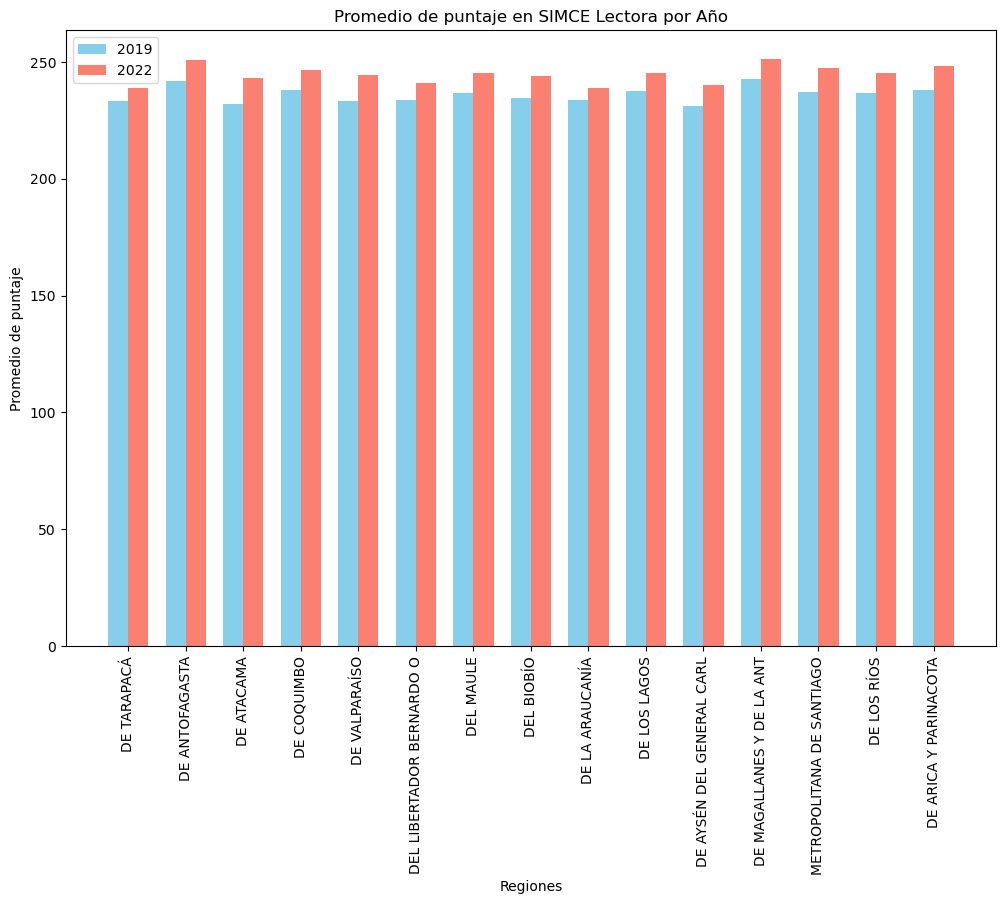

In [15]:
columnas19 = ["nom_rbd", "nom_reg_rbd", "cod_reg_rbd", "prom_lect8b_rbd", "prom_mate8b_rbd"]
df19_8_p2 = pd.read_excel(octavo2019)[columnas19]

promedios19_region_lect = []
promedios19_region_mate = []
for i in range(1, 16):
    df19_region = df19_8_p2[df19_8_p2["cod_reg_rbd"] == i].describe()
    promedios19_region_lect.append(df19_region["prom_lect8b_rbd"]["mean"])
    promedios19_region_mate.append(df19_region["prom_mate8b_rbd"]["mean"])

columnas22 = ["nom_rbd", "nom_reg_rbd", "cod_reg_rbd", "prom_lect2m_rbd", "prom_mate2m_rbd"]
df22_ii_p2 = pd.read_excel(segundo2022)[columnas22]

promedios22_region_lect = []
promedios22_region_mate = []
for i in range(1, 16):
    df22_region = df22_ii_p2[df22_ii_p2["cod_reg_rbd"] == i].describe()
    promedios22_region_lect.append(df22_region["prom_lect2m_rbd"]["mean"])
    promedios22_region_mate.append(df22_region["prom_mate2m_rbd"]["mean"])

regiones = []
for i in range(1, 16):
    nombre_region = df22_ii_p2[df22_ii_p2["cod_reg_rbd"] == i]["nom_reg_rbd"].iloc[0]
    regiones.append(nombre_region)

n_regiones = len(regiones)

x = np.arange(n_regiones)

width = 0.35

fig, ax = plt.subplots(figsize=(12, 8))
barras_2019 = ax.bar(x - width/2, promedios19_region_lect, width, label="2019", color="skyblue")
barras_2022 = ax.bar(x + width/2, promedios22_region_lect, width, label="2022", color="salmon")

ax.set_xlabel("Regiones")
ax.set_ylabel("Promedio de puntaje")
ax.set_title("Promedio de puntaje en SIMCE Lectora por Año")
ax.set_xticks(x)
ax.set_xticklabels(regiones)
ax.set_xticklabels(regiones, rotation=90)
ax.legend()

plt.show()

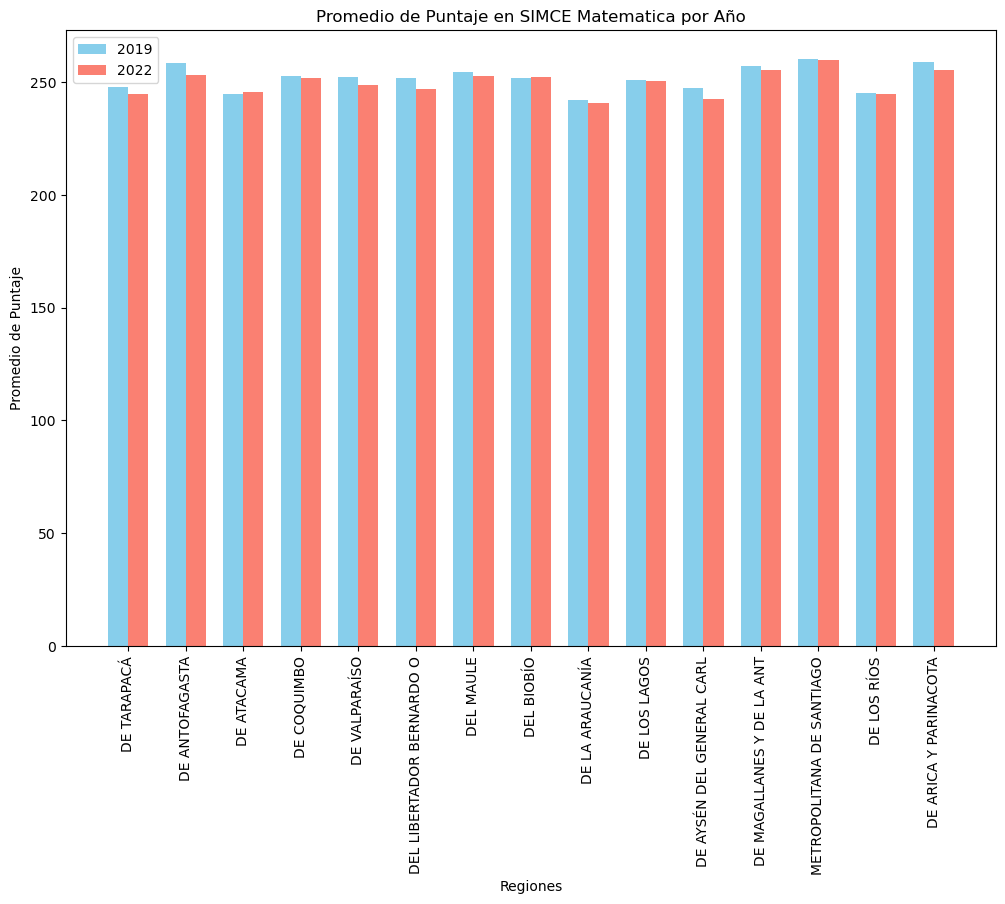

In [16]:
n_regiones = len(regiones)

x = np.arange(n_regiones)

width = 0.35

fig, ax = plt.subplots(figsize=(12, 8))
barras_2019 = ax.bar(x - width/2, promedios19_region_mate, width, label="2019", color="skyblue")
barras_2022 = ax.bar(x + width/2, promedios22_region_mate, width, label="2022", color="salmon")

ax.set_xlabel("Regiones")
ax.set_ylabel("Promedio de Puntaje")
ax.set_title("Promedio de Puntaje en SIMCE Matematica por Año")
ax.set_xticks(x)
ax.set_xticklabels(regiones)
ax.set_xticklabels(regiones, rotation=90)
ax.legend()

plt.show()

# Pregunta 3

Ya que queremos comparar cursos de un nivel parecido (debido a que comparar distintos cursos puede crear una gran varianza que puede confundir los datos), lo mejor seria utilizar los datos de los **cuartos basicos**.

In [17]:
prom22_4 = df22_4[['prom_lect4b_rbd','prom_mate4b_rbd']]
prom16_4 = df16_4[['prom_lect4b_rbd','prom_mate4b_rbd']]
prom14_4 = df14_4[['prom_lect4b_rbd','prom_mate4b_rbd']]

# ahora, unimos a todos

dfprom = pd.concat([prom22_4, prom16_4, prom14_4], axis=1)

dfprom.columns = [
    'Lectura_2022_4toB',
    'Matematicas_2022_4toB',
    'Lectura_2016_4toB',
    'Matematicas_2016_4toB',
    'Lectura_2014_4toB',
    'Matematicas_2014_4toB'
]

dfprom.head()

,Lectura_2022_4toB,Matematicas_2022_4toB,Lectura_2016_4toB,Matematicas_2016_4toB,Lectura_2014_4toB,Matematicas_2014_4toB
0,0.0,0.0,274.0,257.0,274.0,262.0
1,239.0,218.0,271.0,259.0,255.0,239.0
2,222.0,211.0,291.0,298.0,261.0,250.0
3,276.0,250.0,243.0,235.0,234.0,207.0
4,264.0,231.0,257.0,236.0,284.0,270.0


Primero, compararemos las **materias** por si solas.

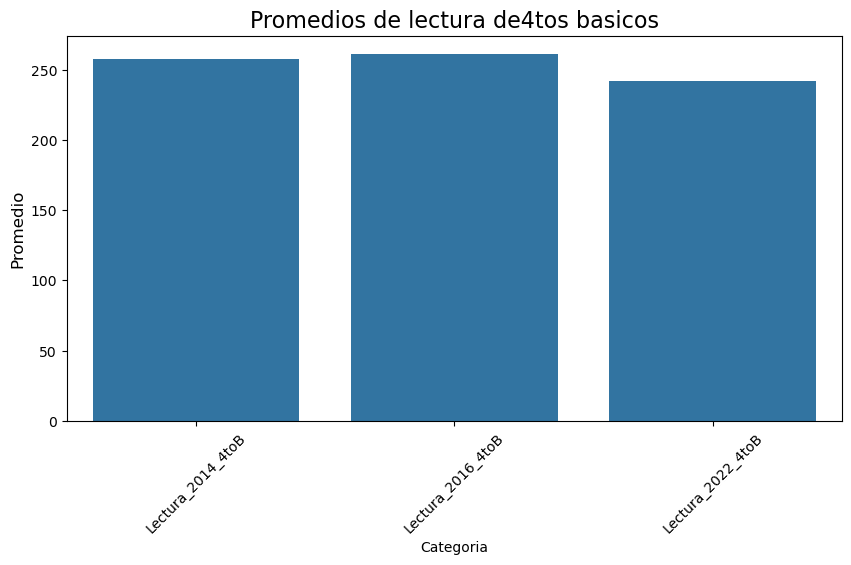

In [18]:
cols_lect = ['Lectura_2014_4toB','Lectura_2016_4toB','Lectura_2022_4toB']

prom_lect = dfprom[cols_lect].mean()
prom_4_lect = prom_lect.reset_index()
prom_4_lect.columns = ['Categoria', 'Promedio']

plt.figure(figsize=(10, 5))
sns.barplot(data=prom_4_lect, x='Categoria', y='Promedio')
plt.title("Promedios de lectura de4tos basicos", fontsize=16)
plt.ylabel("Promedio", fontsize=12)
plt.xticks(rotation=45) 
plt.show()

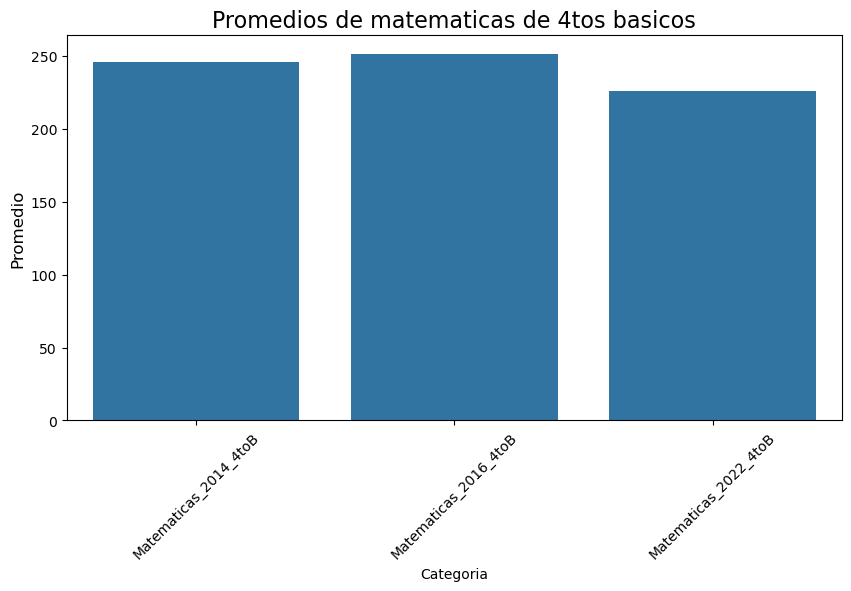

In [19]:
cols_mate = ['Matematicas_2014_4toB','Matematicas_2016_4toB','Matematicas_2022_4toB']

prom_mate = dfprom[cols_mate].mean()
prom_4_mate = prom_mate.reset_index()
prom_4_mate.columns = ['Categoria', 'Promedio']

plt.figure(figsize=(10, 5))
sns.barplot(data=prom_4_mate, x='Categoria', y='Promedio')
plt.title("Promedios de matematicas de 4tos basicos", fontsize=16)
plt.ylabel("Promedio", fontsize=12)
plt.xticks(rotation=45) 
plt.show()

## Analisis
Una simple observacion nos muestra como los resultados bajaron **considerablemente** en los cuartos basicos entre 2016 y 2022. Esto lo podemos dejar mas claro añadiendo un grafico con una regresion lineal R2

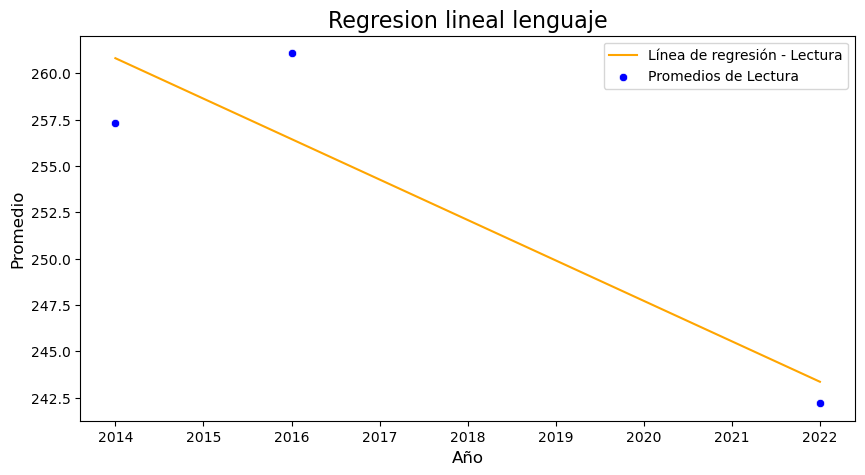

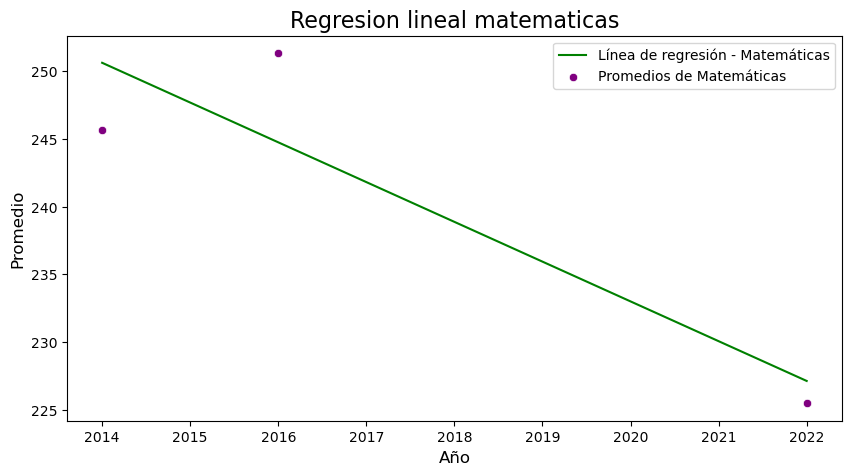

In [20]:
anios = np.array([2014, 2016, 2022])
prom_lect_values = prom_lect.values
prom_mate_values = prom_mate.values 
X = sm.add_constant(anios)

model_lect = sm.OLS(prom_lect_values, X).fit()
model_mate = sm.OLS(prom_mate_values, X).fit()
predicted_lect = model_lect.predict(X)
predicted_mate = model_mate.predict(X)

plt.figure(figsize=(10, 5))
plt.plot(anios, predicted_lect, color='orange', label='Línea de regresión - Lectura')
sns.scatterplot(x=anios, y=prom_lect_values, color='blue', label='Promedios de Lectura')
plt.title("Regresion lineal lenguaje", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Promedio", fontsize=12)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(anios, predicted_mate, color='green', label='Línea de regresión - Matemáticas')
sns.scatterplot(x=anios, y=prom_mate_values, color='purple', label='Promedios de Matemáticas')
plt.title("Regresion lineal matematicas", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Promedio", fontsize=12)
plt.show()

 Esto nos deja mas claro que desde el 2014 al 2022, los puntajes SIMCE han **decaido**. Pero, ¿Cuanto exactamente?

In [21]:
prom_mate, prom_lect

(Matematicas_2014_4toB    245.679023
 Matematicas_2016_4toB    251.316215
 Matematicas_2022_4toB    225.487594
 dtype: float64,
 Lectura_2014_4toB    257.333238
 Lectura_2016_4toB    261.075364
 Lectura_2022_4toB    242.195720
 dtype: float64)

Extrayendo los datos, vemos que del 2016 al 2022 el puntaje promedio bajo en **26 puntos** en matematica, y **19 puntos** en lectura.
### Conclusion
A partir de los graficos y el analisis de ellos, podemos concluir que definitivamente los puntajes SIMCE disminuyeron al pasar de los años.

# Pregunta 4

Analizaremos si hay una relacion entre el tipo de colegio, si es subencionada, privado o estatal y sus puntajes generados.  
Veremos el promedio de ambos cursos en el tiempo, primero en los años 2014, luego en el 2016 y finalmente 2019. Para luego comparalos en total. Que conste que son los mismos curso de la rendicion del SIMCE. Quiere decir que los estamos siguendo en el tiempo, para ver sumejora, aparte comparamos simpre los 4 basicos para una mayor fiadibilidad de datos.

### Datos 2014

In [22]:
print("data/2014/simce4b2014_rbd_publica_final.xlsx")
print("-"*100)
analizar2014 = pd.read_excel("data/2014/simce4b2014_rbd_publica_final.xlsx")
analizar2014 = analizar2014[["cod_grupo", "prom_lect4b_rbd","prom_mate4b_rbd" ]]
display(analizar2014.head())
print("-"*100)


for x in ["Bajo", "Medio", "Alto"]:
    filtrado = analizar2014[analizar2014["cod_grupo"] == x]
    filtrado_matt= filtrado["prom_mate4b_rbd"].mean()
    filtrado_lenguaje= filtrado["prom_lect4b_rbd"].mean()
    print(f"El promedio en el nivel --{x}-- fue de {filtrado_matt} en matematicas y {filtrado_lenguaje} en lenguaje")
print("-"*100)

data/2014/simce4b2014_rbd_publica_final.xlsx
----------------------------------------------------------------------------------------------------


,cod_grupo,prom_lect4b_rbd,prom_mate4b_rbd
0,Medio,274.0,262.0
1,Medio,255.0,239.0
2,Medio,261.0,250.0
3,Medio,234.0,207.0
4,Bajo,284.0,270.0


----------------------------------------------------------------------------------------------------
El promedio en el nivel --Bajo-- fue de 230.854846566001 en matematicas y 246.51727493917275 en lenguaje
El promedio en el nivel --Medio-- fue de 251.99805194805194 en matematicas y 262.4310793237971 en lenguaje
El promedio en el nivel --Alto-- fue de 287.7401960784314 en matematicas y 291.6332518337408 en lenguaje
----------------------------------------------------------------------------------------------------


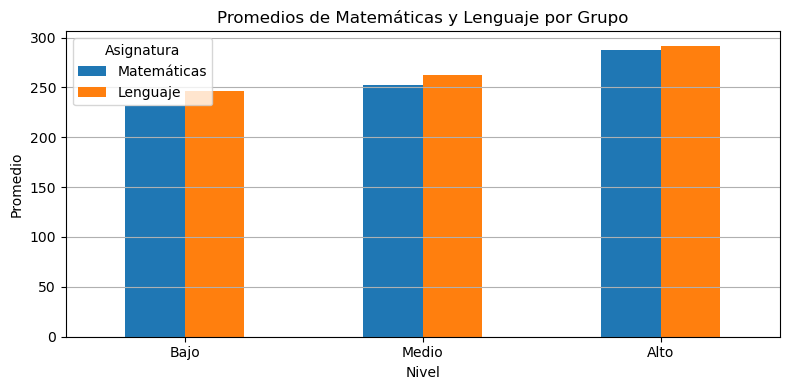

In [23]:
promedios = {}
for x in ["Bajo", "Medio", "Alto"]:
    filtrado = analizar2014[analizar2014["cod_grupo"] == x]
    promedios[x] = {
        "Matemáticas": filtrado["prom_mate4b_rbd"].mean(),
        "Lenguaje": filtrado["prom_lect4b_rbd"].mean()
    }
df_promedios = pd.DataFrame(promedios).T

df_promedios.plot(kind='bar', figsize=(8, 4))
plt.title('Promedios de Matemáticas y Lenguaje por Grupo')
plt.xlabel('Nivel')
plt.ylabel('Promedio')
plt.xticks(rotation=0)
plt.legend(title='Asignatura')
plt.grid(axis='y')


plt.tight_layout()
plt.show()

### Datos 2016

In [24]:
print("data/2016/simce4b2016_rbd_publica_final.xlsx")
print("-"*100)
analizar2016 = pd.read_excel("data/2016/simce4b2016_rbd_publica_final.xlsx")
analizar2016 = analizar2016[["cod_grupo", "prom_lect4b_rbd","prom_mate4b_rbd" ]]
display(analizar2016.head())
print("-"*100)

# FILTRAR
for x in ["Bajo", "Medio", "Alto"]:
    filtrado = analizar2016[analizar2016["cod_grupo"] == x]
    filtrado_matt= filtrado["prom_mate4b_rbd"].mean()
    filtrado_lenguaje= filtrado["prom_lect4b_rbd"].mean()
    print(f"El promedio en el nivel --{x}-- fue de {filtrado_matt} en matematicas y {filtrado_lenguaje} en lenguaje")
print("-"*100)

data/2016/simce4b2016_rbd_publica_final.xlsx
----------------------------------------------------------------------------------------------------


,cod_grupo,prom_lect4b_rbd,prom_mate4b_rbd
0,Medio,274.0,257.0
1,Medio bajo,271.0,259.0
2,Medio,291.0,298.0
3,Medio bajo,243.0,235.0
4,Medio bajo,257.0,236.0


----------------------------------------------------------------------------------------------------
El promedio en el nivel --Bajo-- fue de 235.70483602001113 en matematicas y 251.98171745152354 en lenguaje
El promedio en el nivel --Medio-- fue de 258.4502617801047 en matematicas y 264.9816753926702 en lenguaje
El promedio en el nivel --Alto-- fue de 293.41927710843373 en matematicas y 296.40625 en lenguaje
----------------------------------------------------------------------------------------------------


In [25]:
print("data/2016/simce6b2016_rbd_publica_final.xlsx")
print("-"*100)
analizar2016 = pd.read_excel("data/2016/simce6b2016_rbd_publica_final.xlsx")
analizar2016 = analizar2016[["cod_grupo", "prom_lect6b_rbd","prom_mate6b_rbd" ]]
display(analizar2016.head())
print("-"*100)

# FILTRAR
for x in ["Bajo", "Medio", "Alto"]:
    filtrado = analizar2016[analizar2016["cod_grupo"] == x]
    filtrado_matt= filtrado["prom_mate6b_rbd"].mean()
    filtrado_lenguaje= filtrado["prom_lect6b_rbd"].mean()
    print(f"El promedio en el nivel --{x}-- fue de {filtrado_matt} en matematicas y {filtrado_lenguaje} en lenguaje")
print("-"*100)

data/2016/simce6b2016_rbd_publica_final.xlsx
----------------------------------------------------------------------------------------------------


,cod_grupo,prom_lect6b_rbd,prom_mate6b_rbd
0,Medio,266.0,259.0
1,Medio bajo,248.0,233.0
2,Medio,262.0,247.0
3,Medio,202.0,204.0
4,Medio bajo,237.0,214.0


----------------------------------------------------------------------------------------------------
El promedio en el nivel --Bajo-- fue de 227.03287380699894 en matematicas y 236.9720464135021 en lenguaje
El promedio en el nivel --Medio-- fue de 248.63288590604026 en matematicas y 247.71793149764943 en lenguaje
El promedio en el nivel --Alto-- fue de 290.95497630331755 en matematicas y 277.48578199052133 en lenguaje
----------------------------------------------------------------------------------------------------


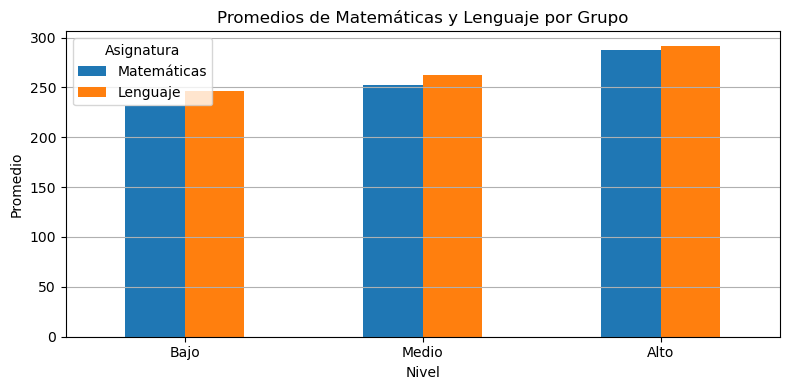

In [26]:
promedios = {}
for x in ["Bajo", "Medio", "Alto"]:
    filtrado = analizar2014[analizar2014["cod_grupo"] == x]
    promedios[x] = {
        "Matemáticas": filtrado["prom_mate4b_rbd"].mean(),
        "Lenguaje": filtrado["prom_lect4b_rbd"].mean()
    }

df_promedios = pd.DataFrame(promedios).T

df_promedios.plot(kind='bar', figsize=(8, 4))
plt.title('Promedios de Matemáticas y Lenguaje por Grupo')
plt.xlabel('Nivel')
plt.ylabel('Promedio')
plt.xticks(rotation=0)
plt.legend(title='Asignatura')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Datos 2019

In [27]:
print("data/2019/simce8b2019_rbd.xlsx")
print("-"*100)
analizar2019 = pd.read_excel("data/2019/simce8b2019_rbd.xlsx")

analizar2019 = analizar2019[["cod_grupo", "prom_lect8b_rbd","prom_mate8b_rbd" ]]
display(analizar2019.head())
print("-"*100)

# FILTRAR
for x in [1.0, 2.0, 3.0]:
    filtrado = analizar2019[analizar2019["cod_grupo"] == x]
    filtrado_matt= filtrado["prom_mate8b_rbd"].mean()
    filtrado_lenguaje= filtrado["prom_lect8b_rbd"].mean()
    print(f"El promedio en el nivel --{x}-- fue de {filtrado_matt} en matematicas y {filtrado_lenguaje} en lenguaje")
print("-"*100)

data/2019/simce8b2019_rbd.xlsx
----------------------------------------------------------------------------------------------------


,cod_grupo,prom_lect8b_rbd,prom_mate8b_rbd
0,3.0,260.0,272.0
1,3.0,249.0,259.0
2,3.0,249.0,275.0
3,3.0,243.0,245.0
4,2.0,201.0,218.0


----------------------------------------------------------------------------------------------------
El promedio en el nivel --1.0-- fue de 234.56357388316152 en matematicas y 224.69897084048029 en lenguaje
El promedio en el nivel --2.0-- fue de 243.03680981595093 en matematicas y 227.31132075471697 en lenguaje
El promedio en el nivel --3.0-- fue de 258.8744507219084 en matematicas y 239.82172002510987 en lenguaje
----------------------------------------------------------------------------------------------------


### Datos 2022

In [28]:
print("data/2022/Simce4b2022_rbd_final.xlsx")
print("-"*100)
analizar2022 = pd.read_excel("data/2022/Simce4b2022_rbd_final.xlsx")

analizar2022 = analizar2022[["cod_grupo", "prom_lect4b_rbd","prom_mate4b_rbd" ]]
display(analizar2022.head())
print("-"*100)

# FILTRAR
for x in {1.0: "Bajo", 2.0: "Medio", 3.0: "Alto"}:
    filtrado = analizar2022[analizar2022["cod_grupo"] == x]
    filtrado_matt= filtrado["prom_mate4b_rbd"].mean()
    filtrado_lenguaje= filtrado["prom_lect4b_rbd"].mean()
    print(f"El promedio en el nivel --{x}-- fue de {filtrado_matt} en matematicas y {filtrado_lenguaje} en lenguaje")
print("-"*100)

data/2022/Simce4b2022_rbd_final.xlsx
----------------------------------------------------------------------------------------------------


,cod_grupo,prom_lect4b_rbd,prom_mate4b_rbd
0,1.0,0.0,0.0
1,1.0,239.0,218.0
2,2.0,222.0,211.0
3,1.0,276.0,250.0
4,4.0,264.0,231.0


----------------------------------------------------------------------------------------------------
El promedio en el nivel --1.0-- fue de 186.32640787315472 en matematicas y 201.73853711790392 en lenguaje
El promedio en el nivel --2.0-- fue de 226.01798410706817 en matematicas y 242.85213032581453 en lenguaje
El promedio en el nivel --3.0-- fue de 239.20474777448072 en matematicas y 257.59655377302437 en lenguaje
----------------------------------------------------------------------------------------------------


In [29]:
print("data/2022/Simce2m2022_rbd_final.xlsx")
print("-"*100)

analizar2022 = pd.read_excel("data/2022/Simce2m2022_rbd_final.xlsx")

analizar2022 = analizar2022[["cod_grupo", "prom_lect2m_rbd","prom_mate2m_rbd" ]]
display(analizar2022.head())
print("-"*100)
# FILTRAR
for x in {1.0: "Bajo", 2.0: "Medio", 3.0: "Alto"}:
    filtrado = analizar2022[analizar2022["cod_grupo"] == x]
    filtrado_matt= filtrado["prom_mate2m_rbd"].mean()
    filtrado_lenguaje= filtrado["prom_lect2m_rbd"].mean()
    print(f"El promedio en el nivel --{x}-- fue de {filtrado_matt} en matematicas y {filtrado_lenguaje} en lenguaje")
print("-"*100)

data/2022/Simce2m2022_rbd_final.xlsx
----------------------------------------------------------------------------------------------------


,cod_grupo,prom_lect2m_rbd,prom_mate2m_rbd
0,1.0,218.0,242.0
1,3.0,230.0,232.0
2,3.0,254.0,271.0
3,3.0,250.0,286.0
4,2.0,221.0,227.0


----------------------------------------------------------------------------------------------------
El promedio en el nivel --1.0-- fue de 222.11818181818182 en matematicas y 222.3030303030303 en lenguaje
El promedio en el nivel --2.0-- fue de 237.0698224852071 en matematicas y 235.08165680473374 en lenguaje
El promedio en el nivel --3.0-- fue de 256.5 en matematicas y 250.95217391304348 en lenguaje
----------------------------------------------------------------------------------------------------


### Conclusion
En conclusion, hubo un gran diferencia entre los colegios de nivel bajo, medio y alto. Pero logramos que este diferencia se va a cortando con los años. Los puntajes en promedio son de 10 pts superior por categoria. Los de bajo tiene -10 que los medio y los altos tienen un +10 en puntaje, en promedio. Aunque cuando los alumnos son mas chico hay una diferencia mayor. 

# Pregunta 5 (lo voy a tratar de solucionar desp)

In [43]:
df14_4_p5 = pd.read_excel("data/2014/simce4b2014_rbd_publica_final.xlsx")
columnas = ['nom_rbd','prom_lect4b_rbd','prom_mate4b_rbd','agno']
df14_4_p5 = df14_4_p5[columnas]

df16_6_p5 = pd.read_excel("data/2016/simce6b2016_rbd_publica_final.xlsx")
columnas = ['nom_rbd','prom_lect6b_rbd','prom_mate6b_rbd','agno']
df16_6_p5 = df16_6_p5[columnas]

df19_8_p5 = pd.read_excel('data/2019/simce8b2019_rbd.xlsx')
columnas = ['nom_rbd','prom_lect8b_rbd','prom_mate8b_rbd','agno']
df19_8_p5 = df19_8_p5[columnas]

df22_ii_p5 = pd.read_excel("data/2022/Simce2m2022_rbd_final.xlsx")
columnas = ['nom_rbd','prom_lect2m_rbd','prom_mate2m_rbd',"agno"]
df22_ii_p5 = df22_ii_p5[columnas]

dfs = [df14_4_p5, df16_6_p5, df19_8_p5, df22_ii_p5]

for i in range(len(dfs)):
    num = (i + 1) * 2
    if i == 0:
        columnas = [f"prom_lect{num}m_rbd", f"prom_mate{num}m_rbd"]
    else:
        columnas = [f"prom_lect{num}b_rbd", f"prom_mate{num}b_rbd"]
    obj = dfs[i]
    obj["prom_ptjs"] = obj[columnas].mean(axis=1)
    obj.rename(columns={columnas[0]: "prom_lect", columnas[1]: "prom_mate"}, inplace=True)

KeyError: "None of [Index(['prom_lect2m_rbd', 'prom_mate2m_rbd'], dtype='object')] are in the [columns]"

# Pregunta 6

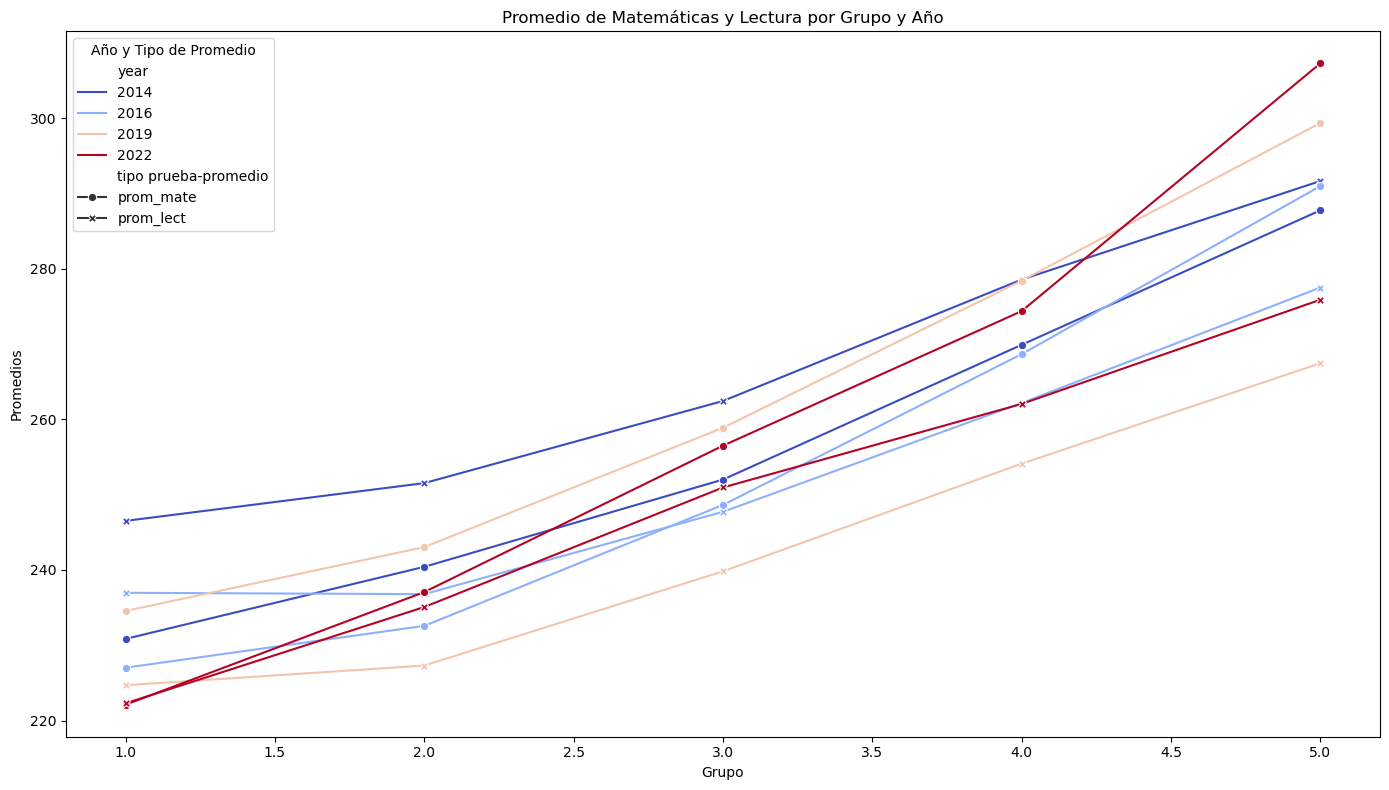

In [45]:
# recibe un df con cod_grupo de tipo object y transforma a int
def estandarizar_cod_grupo(df):
    mapeo_grupos = {
    'Bajo': 1,
    'Medio bajo': 2,
    'Medio': 3,
    'Medio alto': 4,
    'Alto': 5 }
    df['cod_grupo'] = df['cod_grupo'].replace(mapeo_grupos)
    return df

df14_mean = df14_4.groupby('cod_grupo')[['prom_lect4b_rbd', 'prom_mate4b_rbd']].mean().reset_index()
df14_mean.columns = ['cod_grupo', 'prom_lect4b_rbd','prom_mate4b_rbd']
df14_mean = estandarizar_cod_grupo(df14_mean)
df14_mean['prom_lect'], df14_mean['prom_mate'] = round(df14_mean['prom_lect4b_rbd'], 2), round(df14_mean['prom_mate4b_rbd'], 2)
df14_mean['year'] = 2014

df16_mean_6 = df16_6.groupby('cod_grupo')[['prom_lect6b_rbd', 'prom_mate6b_rbd']].mean().reset_index()
df16_mean_6.columns = ['cod_grupo', 'prom_lect6b_rbd','prom_mate6b_rbd']
df16_mean_6 = estandarizar_cod_grupo(df16_mean_6)
df16_mean_6['prom_lect'], df16_mean_6['prom_mate'] = round(df16_mean_6['prom_lect6b_rbd'], 2), round(df16_mean_6['prom_mate6b_rbd'], 2)
df16_mean_6['year'] = 2016

df16_mean_4 = df16_4.groupby('cod_grupo')[['prom_lect4b_rbd', 'prom_mate4b_rbd']].mean().reset_index()
df16_mean_4.columns = ['cod_grupo', 'prom_lect4b_rbd','prom_mate4b_rbd']
df16_mean_4 = estandarizar_cod_grupo(df16_mean_4)
df16_mean_4['prom_lect'], df16_mean_4['prom_mate'] = round(df16_mean_4['prom_lect4b_rbd'], 2), round(df16_mean_4['prom_mate4b_rbd'], 2)
df16_mean_4['year'] = 2016

df19_mean = df19_8.groupby('cod_grupo')[['prom_lect8b_rbd', 'prom_mate8b_rbd']].mean().reset_index()
df19_mean.columns = ['cod_grupo', 'prom_lect8b_rbd', 'prom_mate8b_rbd']
df19_mean['prom_lect'], df19_mean['prom_mate'] = round(df19_mean['prom_lect8b_rbd'], 2), round(df19_mean['prom_mate8b_rbd'], 2)
df19_mean['year'] = 2019

df22_mean_2 = df22_ii.groupby('cod_grupo')[['prom_lect2m_rbd', 'prom_mate2m_rbd']].mean().reset_index()
df22_mean_2.columns = ['cod_grupo', 'prom_lect2m_rbd','prom_mate2m_rbd']
df22_mean_2['prom_lect'], df22_mean_2['prom_mate'] = round(df22_mean_2['prom_lect2m_rbd'], 2), round(df22_mean_2['prom_mate2m_rbd'], 2)
df22_mean_2['year'] = 2022

df22_mean_4 = df22_4.groupby('cod_grupo')[['prom_lect4b_rbd', 'prom_mate4b_rbd']].mean().reset_index()
df22_mean_4.columns = ['cod_grupo', 'prom_lect4b_rbd','prom_mate4b_rbd']
df22_mean_4['prom_lect'], df22_mean_4['prom_mate'] = round(df22_mean_4['prom_lect4b_rbd'], 2), round(df22_mean_4['prom_mate4b_rbd'], 2)
df22_mean_4['year'] = 2022

# se comparan distintos años y cursos
df_graf = pd.concat([df14_mean, df16_mean_6, df19_mean, df22_mean_2], ignore_index=True)

df_long = pd.melt(
    df_graf,
    id_vars=["cod_grupo", "year"],
    value_vars=["prom_mate", "prom_lect"],
    var_name="tipo prueba-promedio",
    value_name="promedio"
)

plt.figure(figsize=(14, 8))

sns.lineplot(
    data=df_long,
    x="cod_grupo",
    y="promedio",
    hue="year",
    style="tipo prueba-promedio",
    markers=True,
    dashes=False,
    palette='coolwarm'
)

plt.xlabel("Grupo")
plt.ylabel("Promedios")
plt.title("Promedio de Matemáticas y Lectura por Grupo y Año")
plt.legend(title="Año y Tipo de Promedio")

plt.tight_layout()
plt.show()

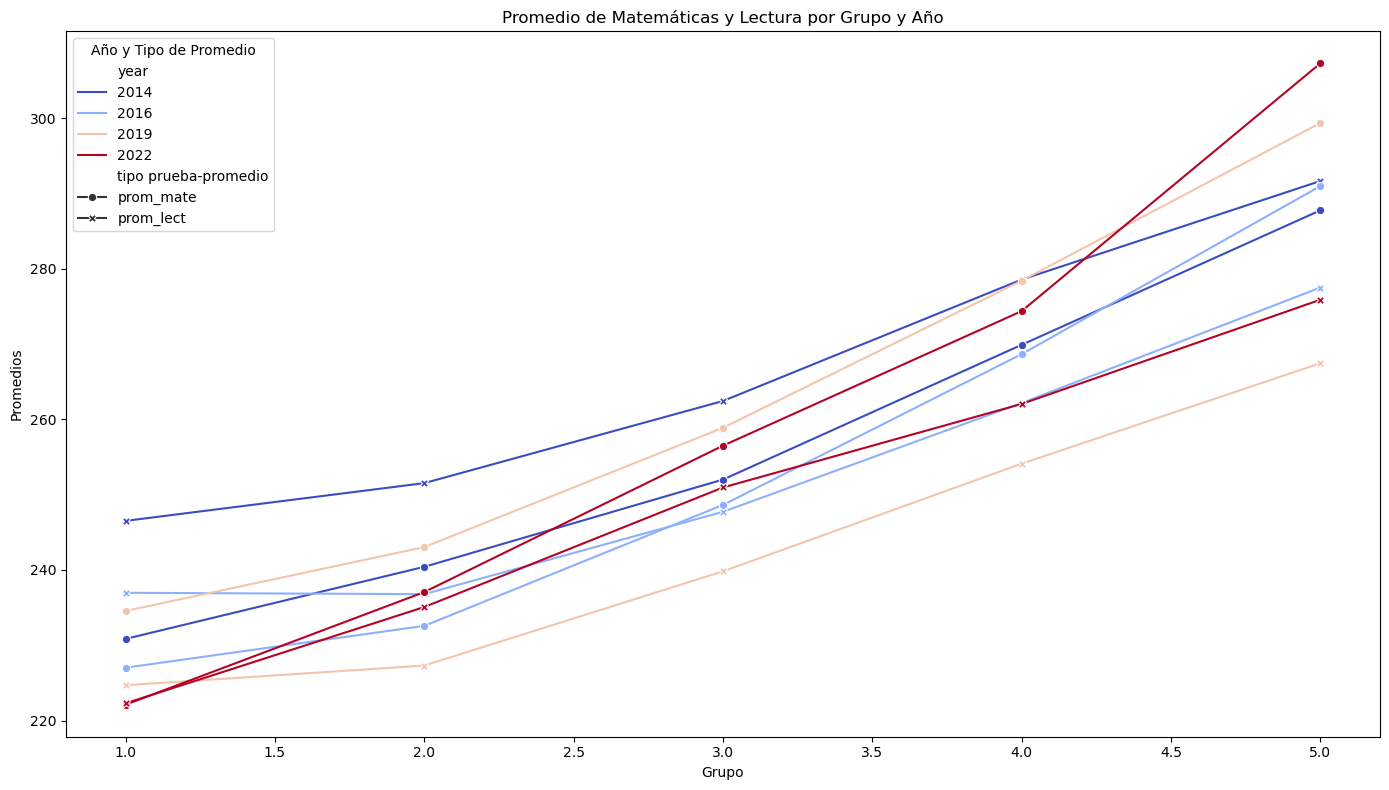

In [46]:
# se comparan distintos años y cursos
df_graf = pd.concat([df14_mean, df16_mean_6, df19_mean, df22_mean_2], ignore_index=True)

df_long = pd.melt(
    df_graf,
    id_vars=["cod_grupo", "year"],
    value_vars=["prom_mate", "prom_lect"],
    var_name="tipo prueba-promedio",
    value_name="promedio"
)

plt.figure(figsize=(14, 8))

sns.lineplot(
    data=df_long,
    x="cod_grupo",
    y="promedio",
    hue="year",
    style="tipo prueba-promedio",
    markers=True,
    dashes=False,
    palette='coolwarm'
)

plt.xlabel("Grupo")
plt.ylabel("Promedios")
plt.title("Promedio de Matemáticas y Lectura por Grupo y Año")
plt.legend(title="Año y Tipo de Promedio")

plt.tight_layout()
plt.show()

## Analisis(primer grafico)
El grafico muestra el promedio de puntaje en las pruebas de matematicas y lenguaje en distintos años y cursos en base a el nivel socioeconomico del establecimiento.
### Los resultados indican que:
1. El resultado promedio en las pruebas es mejor dependiendo del nivel socioeconomico del establecimiento.
2. En la prueba de lenguaje de 2019 se visualiza el peor rendimiento a nivel general de todos los datos analizados.
3. En la prueba de lenguaje de 2014 se presenta el mejor resultado con diferencia en la prueba para establecimientos de nivel socioeconomico tipo 1.
4. En 2022 en la prueba de matematicas se presenta el mejor resultado con diferencia para establecimientos de nivel tipo 5.

## Conclusion:
En base al analisis realizado, podemos concluir que el nivel socioeconomico influye significativamente en los resultados de la prueba SIMCE obteniendo mejores resultados los establecimiento con un nivel socioeconomico alto(5), mientras que al disminuir el nivel socioeconomico los resultados van en declive.

## Analisis(segundo grafico)
El grafico muestra el promedio de puntaje en las pruebas de matematicas y lenguaje en distintos años y mismo grado en base a el nivel socioeconomico del establecimiento.

## Los resultados indican que:
Se comparte el punto 1.
1. En la prueba de lenguaje de 2016 se presenta el mejor resultado con diferencia por nivel socioeconomico.
2. La prueba de matematicas en 2022 cuenta con los peores resultados con diferencia en los años estudiados.
3. Podemos ver que en 2014 y 2016 los resultados en las pruebas era mejor en establecimientos de nivel socieconomico 1 y decrecio en cuanto a 2022.

## Conclusion:
Podemos concluir que al analizar el mismo grado de educacion en distintos años hay una diferencia significativa en cuanto a los resultados de la prueba SIMCE dependiendo del nivel socieconomico del establecimiento, donde si es menor este nivel los resultados seran peores a los obtenidos por establecimiento con mejor nivel socioeconomico.